# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
df=pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code


200

In [5]:
import os
with open ('image-predictions.tsv','wb') as file:
 file.write(r.content)   

In [6]:
df2=pd.read_csv('image-predictions.tsv',sep="\s+")
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

**i find error on the code that i take it from udicity do i fix it 
**and i cheaked from the code which means it's correct** 

In [8]:
df_list=[]

with open('tweet-json.txt','r',encoding='utf8') as f:
    for line in f :
        tl=json.loads(line)
        df_list.append({'tweet_id':tl['id'],
                        'favorites':tl['favorite_count'],
                        'retweets':tl['retweet_count']})
tw_api=pd.DataFrame(df_list)
tw_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [9]:
tw_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df2.tail()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tw_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [18]:
tw_api.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [19]:
df[(df.rating_numerator<10)].rating_numerator.count()

440

### Quality issues
1.in rating_numerator there is rating less than 10 

2.in twitter_archive columns (name) there is a multiball a which doesn't make sence 

3.the tweiteer id in tweiter archive is 2356 and tw_api= 2354 don't mach eachother

4.there is a dupllicated data in image_predictions colmuns p1 and p2 and p3

5.there is a null values in twitter_archive specifc in (in_reply_to_status_id) columns

6.change the type of timestamp in twitter_ar to to_datetime timestamp()

7.Keep original ratings (no retweets) that have images

8.text column includes a text and a short link.




### Tidiness issues
1.first change the type of id's in twitter api to int to match the other tables

then i marged the tow data set twitter_ar and image predaction

and then i kept the rows that have image

2.assign the three colmns to one columns becauese it's not varibles so we need one coulmns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
twitter_ar=df.copy()
image_p=df2.copy()
tapi=tw_api.copy()

### Issue #1:

#### Define:
** the first Quality issues is : in rating_numerator there is rating less than 10 ,so i well replace it  with the mean 


#### Code

In [21]:
twitter_ar['rating_numerator'].mask(twitter_ar['rating_numerator']<10,twitter_ar['rating_numerator'].mean(),inplace=True)

#### Test

In [22]:
twitter_ar[twitter_ar.rating_numerator<10].rating_numerator.count()

0

***we cheak from the values under 10 and it's equal to zero*** 

### Issue #2:

#### Define:
2.in twitter_archive name there is  multiball 'a' which doesn't make sence 
so i will replace it with none

#### Code

In [23]:
twitter_ar['name'].mask(twitter_ar['name']=='a','none',inplace=True)

#### Test

In [24]:
twitter_ar[twitter_ar['name']=='a'].name.count()

0

**so we cheak that we changed all the a with none str

### Issue #3:

#### Define:
Change all p1, p2, and p3 values to lowercase

#### Code

In [25]:
image_p['p1'] = image_p['p1'].str.lower()
image_p['p2'] = image_p['p2'].str.lower()
image_p['p3'] = image_p['p3'].str.lower()

#### Test

In [26]:
image_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


the change to lower case is worked

### Issue #4:

#### Define:
4.there is a dupllicated data in image_predictions p1 and p2 and p3 so we deleat it


#### Code

In [27]:
s=image_p.drop_duplicates(subset=['p1','p2','p3'],inplace=True)
print(s)

None


### Test

In [28]:
image_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1742 non-null   int64  
 1   jpg_url   1742 non-null   object 
 2   img_num   1742 non-null   int64  
 3   p1        1742 non-null   object 
 4   p1_conf   1742 non-null   float64
 5   p1_dog    1742 non-null   bool   
 6   p2        1742 non-null   object 
 7   p2_conf   1742 non-null   float64
 8   p2_dog    1742 non-null   bool   
 9   p3        1742 non-null   object 
 10  p3_conf   1742 non-null   float64
 11  p3_dog    1742 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.2+ KB


**so here we deleat the duplicated valuse in p1 and p2 and p3 and the total number will be 1742 and before was 2075

### Issue #5:

#### Define:
Delete retweets by filtering the NaN of retweeted_status_id 

#### Code

In [29]:
twitter_ar = twitter_ar[pd.isnull(twitter_ar.retweeted_status_id)]

In [30]:
twitter_ar = twitter_ar[pd.isnull(twitter_ar.in_reply_to_status_id)]

### Test

In [31]:
print(sum(twitter_ar.retweeted_status_user_id.value_counts()))


0


In [32]:
## i drop the tow columns
twitter_ar= twitter_ar.drop(['in_reply_to_user_id','retweeted_status_id'],1);

C:\Users\raghad\AppData\Local\Temp\ipykernel_7916\3573985964.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_ar= twitter_ar.drop(['in_reply_to_user_id','retweeted_status_id'],1);


cheaked from tow columns

### Issue #6:

#### Define:
there is an outlieres in tapi in retweets coulmns equal to 79515


#### Code

In [33]:
tapi.drop(tapi[tapi.retweets==79515].index,inplace=True)

### Test

In [34]:
tapi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2353 non-null   int64
 1   favorites  2353 non-null   int64
 2   retweets   2353 non-null   int64
dtypes: int64(3)
memory usage: 73.5 KB


so we delaet the outlires suecessfuly the result was 2354 and now is 2353 

### Issue #7:

#### Define:
change the type of timestamp in twitter_ar to to_datetime timestamp()
then Separate timestamp into day - month - year (3 columns)

#### Code

In [35]:
twitter_ar['timestamp']=pd.to_datetime(twitter_ar['timestamp'])


In [36]:
twitter_ar['year'] = twitter_ar['timestamp'].dt.year
twitter_ar['month'] = twitter_ar['timestamp'].dt.month
twitter_ar['day'] = twitter_ar['timestamp'].dt.day

In [37]:
twitter_ar = twitter_ar.drop('timestamp', 1)

C:\Users\raghad\AppData\Local\Temp\ipykernel_7916\3868504822.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_ar = twitter_ar.drop('timestamp', 1)


### Test

In [38]:
twitter_ar.head()


,tweet_id,in_reply_to_status_id,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,2017,7,29


so we cheak that we change the type sueccesfully and sprate the the day's and month and year

### Issue #8:

#### Define:
text column includes a text and a short link.
so first i cheak from the text and confert it to string then i add just the text

#### Code

In [39]:
twitter_ar.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [66]:
twitter_ar['source'] = twitter_ar['source'].astype(str)

In [63]:
#the source column has only 4 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
d = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
c = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
b = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [67]:
twitter_ar.source = twitter_ar.source.replace(a, 'Twitter for iPhone')
twitter_ar.source = twitter_ar.source.replace(b, 'Twitter Web Client')
twitter_ar.source = twitter_ar.source.replace(c, 'TweetDeck')
twitter_ar.source = twitter_ar.source.replace(d, 'Vine - Make a Scene')


### Test

In [65]:
twitter_ar.source.value_counts()


Twitter for iPhone     1964
Vine - Make a Scene      91
TweetDeck                31
Twitter Web Client       11
Name: source, dtype: int64

so the result is clean and orgnize now

### Tidnees issue

### Issue #1:

#### Define:
first change the type of id's in twitter api to int to match the other tables

then i marged the tow data set twitter_ar and image predaction

and then i kept the rows that have image

#### Code

In [44]:
tw_api['tweet_id'] = tw_api['tweet_id'].astype(int)

#TEST
tw_api['tweet_id'].dtypes


dtype('int32')

In [45]:
df_t = pd.merge(twitter_ar,image_p, how = 'left', on = ['tweet_id'])

#keep rows that have picture (img_num)
df_t = df_t[df_t['img_num'].notnull()]


### Test

In [46]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 0 to 2096
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1706 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   source                      1706 non-null   object 
 3   text                        1706 non-null   object 
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   expanded_urls               1706 non-null   object 
 7   rating_numerator            1706 non-null   float64
 8   rating_denominator          1706 non-null   int64  
 9   name                        1706 non-null   object 
 10  doggo                       1706 non-null   object 
 11  floofer                     1706 non-null   object 
 12  pupper                      1706 non-null   object 
 13  puppo                       1706 

### Issue #2:

#### Define:
2.assign the three colmns to one columns becauese it's not varibles name so we need one coulmns

#### Code

In [47]:
twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   source                      2097 non-null   object 
 3   text                        2097 non-null   object 
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   expanded_urls               2094 non-null   object 
 7   rating_numerator            2097 non-null   float64
 8   rating_denominator          2097 non-null   int64  
 9   name                        2097 non-null   object 
 10  doggo                       2097 non-null   object 
 11  floofer                     2097 non-null   object 
 12  pupper                      2097 non-null   object 
 13  puppo                       2097 

In [48]:
#twitter_ar[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '',inplace=True,regex=True)


In [49]:
twitter_ar.doggo = twitter_ar.doggo.str.replace('None', '')
twitter_ar.floofer = twitter_ar.floofer.str.replace('None', '')
twitter_ar.pupper = twitter_ar.pupper.str.replace('None', '')
twitter_ar.puppo = twitter_ar.puppo.str.replace('None', '')



In [50]:
twitter_ar['dog_type'] = twitter_ar['doggo'] + twitter_ar['floofer'] + twitter_ar['pupper'] + twitter_ar['puppo']


In [51]:
twitter_ar=twitter_ar.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [52]:
twitter_ar.dog_type.value_counts()


                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [53]:
twitter_ar.loc[twitter_ar.dog_type == 'doggopupper', 'dog_type'] = 'doggo and pupper'
twitter_ar.loc[twitter_ar.dog_type == 'doggopuppo', 'dog_type'] = 'doggo and puppo'
twitter_ar.loc[twitter_ar.dog_type == 'doggofloofer', 'dog_type'] = 'doggo and floofer'


In [54]:
twitter_ar.dog_type.value_counts()


                     1761
pupper                221
doggo                  72
puppo                  23
floofer                 9
doggo and pupper        9
doggo and puppo         1
doggo and floofer       1
Name: dog_type, dtype: int64

so here i deleat the four columns and make just one columns called dog_type

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
clean_data = pd.merge(twitter_ar, image_p, on='tweet_id', how='inner').merge(tapi, on='tweet_id', how='inner' )


In [56]:
clean_data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


In [57]:
clean_data = pd.read_csv("twitter_archive_master.csv")


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
clean_data.describe()

,tweet_id,in_reply_to_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,year,month,day,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,1.705000e+03,0.0,0.0,0.0,1705.000000,1705.000000,1705.00000,1705.000000,1705.000000,1705.000000,1705.000000,1.705000e+03,1.705000e+03,1705.000000,1705.000000
mean,7.297534e+17,NaN,NaN,NaN,13.677620,10.529619,2015.78827,7.304399,16.020528,1.189443,0.571305,1.336465e-01,6.254765e-02,8096.575367,2552.885630
std,6.528278e+16,NaN,NaN,NaN,44.652811,7.303239,0.69394,4.168757,8.904036,0.543749,0.272950,9.773065e-02,5.001676e-02,11331.361403,4204.376047
min,6.660209e+17,NaN,NaN,NaN,10.000000,2.000000,2015.00000,1.000000,1.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.746443e+17,NaN,NaN,NaN,11.000000,10.000000,2015.00000,3.000000,8.000000,1.000000,0.338757,5.677530e-02,1.959530e-02,1691.000000,584.000000
50%,7.016016e+17,NaN,NaN,NaN,12.000000,10.000000,2016.00000,8.000000,16.000000,1.000000,0.548907,1.180890e-01,5.424740e-02,3723.000000,1262.000000
75%,7.753648e+17,NaN,NaN,NaN,13.126486,10.000000,2016.00000,11.000000,24.000000,1.000000,0.821704,1.920310e-01,9.412690e-02,10180.000000,2893.000000
max,8.924206e+17,NaN,NaN,NaN,1776.000000,170.000000,2017.00000,12.000000,31.000000,4.000000,1.000000,4.880140e-01,2.706730e-01,132810.000000,56625.000000


In [59]:
clean_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'source', 'text',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'year', 'month', 'day', 'dog_type', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorites', 'retweets'],
      dtype='object')

In [60]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1705 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   source                      1705 non-null   object 
 3   text                        1705 non-null   object 
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      float64
 6   expanded_urls               1705 non-null   object 
 7   rating_numerator            1705 non-null   float64
 8   rating_denominator          1705 non-null   int64  
 9   name                        1705 non-null   object 
 10  year                        1705 non-null   int64  
 11  month                       1705 non-null   int64  
 12  day                         1705 non-null   int64  
 13  dog_type                    253 n

### Insights:
1.the mean of rating_numerator is 13.725702 

2.the maxumiam number of image is 4 and the most of the tweets have one image

3.the maxiumam number of retweets is 56625 and the minumam is 16

4.i have p1_dog,p2_dog,p3_dog bool(3)

5.there is 1740 entries from favorites and retweets



### Visualization

which most dog type is retweeted

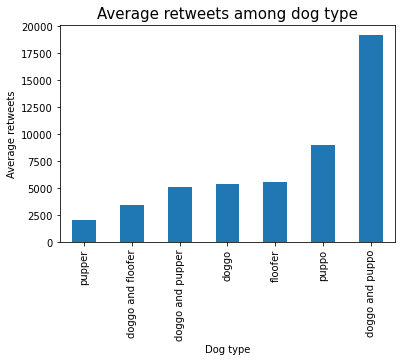

In [61]:
avg_ret = clean_data.groupby('dog_type').retweets.mean().sort_values(ascending=True).plot(kind = 'bar')
plt.ylabel('Average retweets')
plt.title('Average retweets among dog type', size=15)
plt.xlabel('Dog type')
plt.plot();

# from the graph we noticed  that the doggo and puppo is the the most Frequently retweeted 

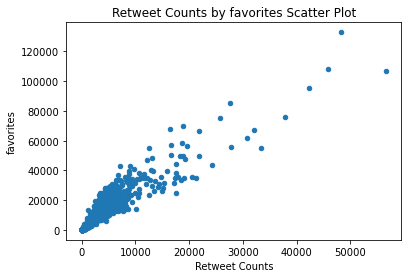

In [62]:
clean_data.plot(x='retweets', y='favorites', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('favorites')
plt.title('Retweet Counts by favorites Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

the highest retweets have the most favorites count and they have a positve corrlation

## helpful resourese:##
 https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

https://www.geeksforgeeks.org/merge-two-pandas-dataframes-by-matched-id-number/?ref=rp


https://datatofish.com/remove-duplicates-pandas-dataframe/

https://statisticsglobe.com/delete-rows-in-pandas-dataframe-conditionally-python#example-1-remove-rows-of-pandas-dataframe-using-logical-condition

https://colab.research.google.com/drive/17hYw_f86jGapEr6s-Ls81ZmC--16a5pg?usp=sharing#scrollTo=a62vVnllMJep

https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe